In [1]:
# imports
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset (Pavlick Formality Scores)

**Download**

To enable this notebook to run, please download the following .csv files  from [here](https://huggingface.co/datasets/osyvokon/pavlick-formality-scores/tree/main) and save them in ./data (Hint: click on the file size):
- all.csv
- test.csv
- train.csv

## Load, view and understand the structure of the data

In [2]:
# load all data
df = pd.read_csv('./data/all.csv')
# load traning data
#df = pd.read_csv('./data/train.csv')
# load test data
#df = pd.read_csv('./data/test.csv')

In [3]:
df.head()

,domain,avg_score,sentence
0,answers,-1.4,Pimp (10) Successfully complete all the Snatch...
1,answers,-1.8,it's a Holiday Inn for terroists.
2,answers,-2.0,Good Luck and don't give up!
3,answers,0.2,Most SHC victims are found near a heat source.
4,answers,-1.6,Tanay: I did have an opinion.


In [4]:
df.shape

(11274, 3)

## WordCloud

### Informal (formality score $\leq-2$)
![image](./images/informal-wordcloud.svg)

### Formal (formality score $\geq2$)
![image](./images/formal-wordcloud.svg)


WordClouds created using [this](https://www.jasondavies.com/wordcloud/) website.

## EDA

### Number of datapoints per domain

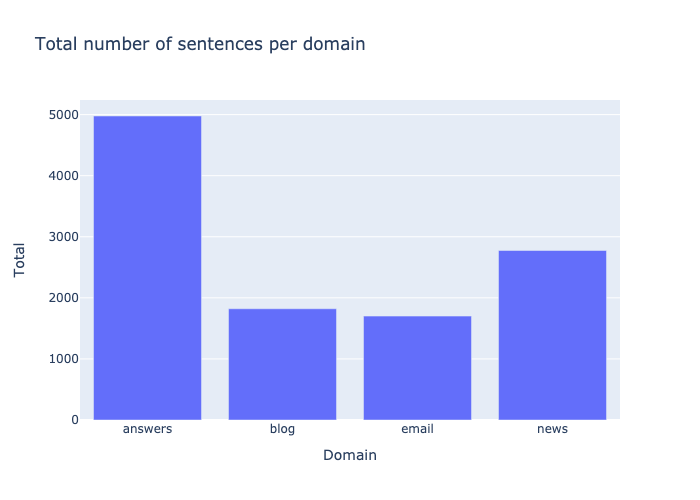

In [5]:
fig = px.bar(df.groupby('domain').count().reset_index(),
             x='domain', y='avg_score',
             labels={'domain':'Domain', 'avg_score':'Total'},
             title="Total number of sentences per domain"
            )
fig.show("png")

### Average Formality score per Domain

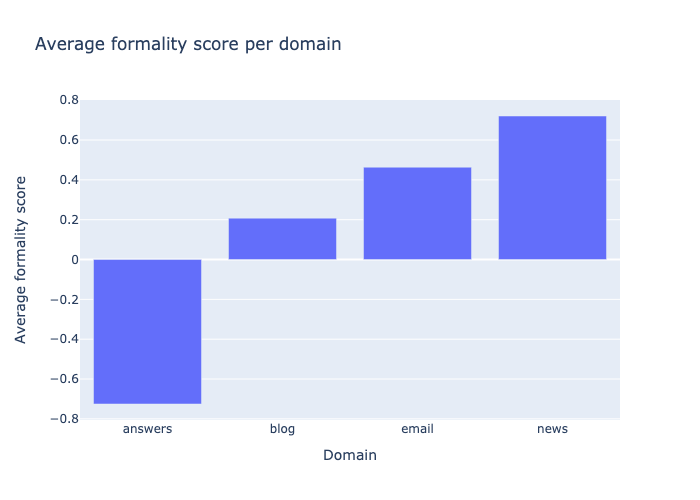

In [6]:
fig = px.bar(df[['domain', 'avg_score']].groupby('domain').mean().reset_index(),
             x='domain', y='avg_score',
             labels={'domain':'Domain', 'avg_score':'Average formality score'},
             title = 'Average formality score per domain'
            )
fig.show("png")

As we can see from the above averages of each domain, the 'answers' domain contains the least formal sentences on average compared to the 'news' domain which contains the most formal sentences on average with blogs and emails inbetween.

### Total number of informal ($<0$) and formal ($\geq0$) sentences per domain

In [7]:
df_informal = df[(df['avg_score']<0)].groupby('domain').count()
df_informal = df_informal[[ 'avg_score']].rename(columns={'avg_score':'informal'})
df_formal = df[(df['avg_score']>=0)].groupby('domain').count()
df_formal = df_formal[['avg_score']].rename(columns={'avg_score':'formal'})
df_formality_count = pd.concat([df_informal, df_formal], axis=1).reset_index()
df_formality_count

,domain,informal,formal
0,answers,3363,1614
1,blog,663,1158
2,email,555,1146
3,news,474,2301


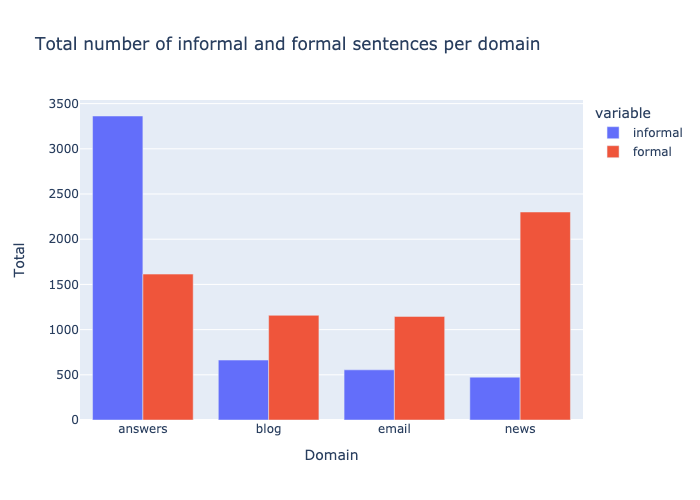

In [8]:
fig = px.bar(df_formality_count.melt(id_vars=['domain'], value_vars=['informal', 'formal']),
             x='domain', y='value', 
             labels={'domain':'Domain', 'value':'Total'}, 
             color='variable', 
             title="Total number of informal and formal sentences per domain",
             barmode='group'
            )
fig.show("png")

Following from the average score per domain, the total of informal and formal sentences per domain show that answers have the most informal sentences and news has the most formal sentences. Blog and emails seem to have the same number of informal and formal sentences.

### Total number of informal ($<0$) and formal ($\geq0$) sentences

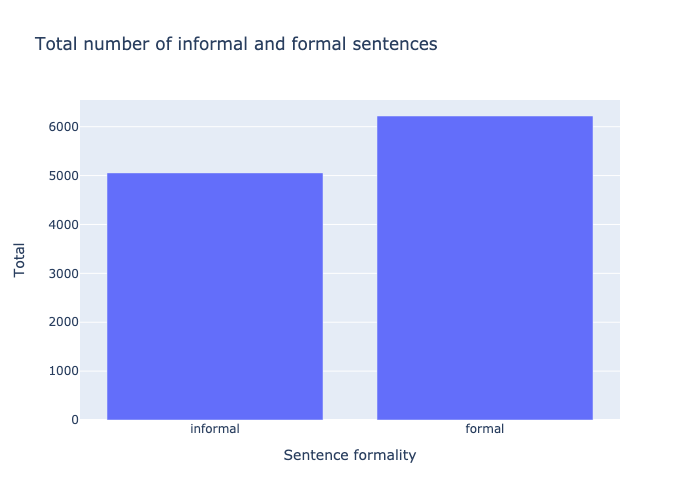

In [9]:
fig = px.bar(df_formality_count.sum(numeric_only=True),
             labels={'index':'Sentence formality', 'value':'Total'},
             title = 'Total number of informal and formal sentences'
            )
fig.update_layout(showlegend=False)
fig.show("png")

There is a good balance between informal and formal sentences within the dataset.

### Distribution of formality scores

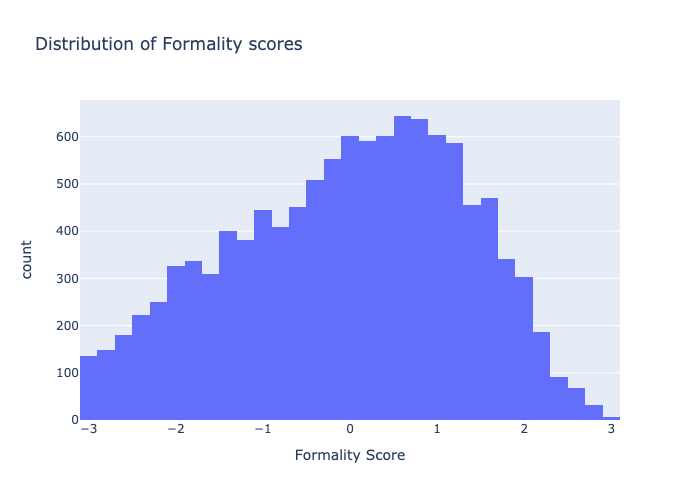

In [10]:
fig = px.histogram(df, x='avg_score', nbins=35,
                   labels={'domain':'Domain', 'avg_score':'Formality Score'},
                   title="Distribution of Formality scores",
                  )
fig.show("png")

The distribution of formality score within the whole dataset shows a skew towards informal sentences. There is a lack of sentences with a high formality score compared to sentences with a low formality score.

### Distribution of formality scores per domain

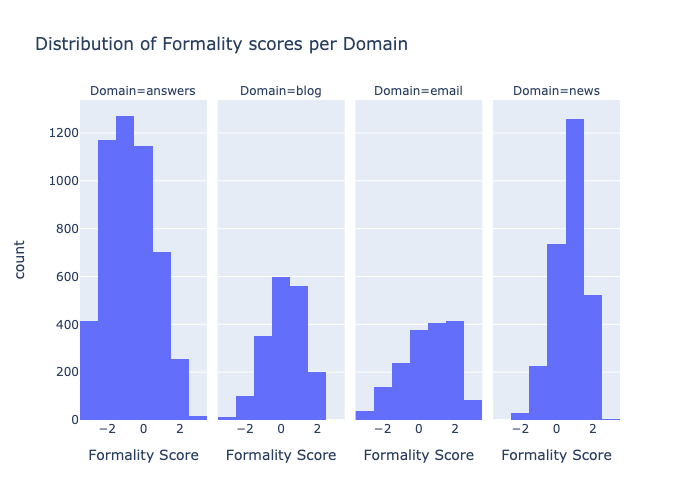

In [11]:
fig = px.histogram(df, x='avg_score', nbins=12,
                   labels={'domain':'Domain', 'avg_score':'Formality Score'},
                   title="Distribution of Formality scores per Domain",
                   facet_col='domain'
                  )
fig.show("png")

Distribution per domain shows blog and email have a normal like distribution compared with answers that is skewed towards informal sentences and news that is skewed towards formal sentences but closer to zero as there is a lack of high scoring formal sentences.

## Sentence length

In [12]:
df['sentence_length_char'] = df['sentence'].str.len()
df['sentence_length_words'] = df['sentence'].str.split().str.len()
df.head()

,domain,avg_score,sentence,sentence_length_char,sentence_length_words
0,answers,-1.4,Pimp (10) Successfully complete all the Snatch...,68,10
1,answers,-1.8,it's a Holiday Inn for terroists.,33,6
2,answers,-2.0,Good Luck and don't give up!,28,6
3,answers,0.2,Most SHC victims are found near a heat source.,46,9
4,answers,-1.6,Tanay: I did have an opinion.,29,6


### Distribution of number of characters in sentences

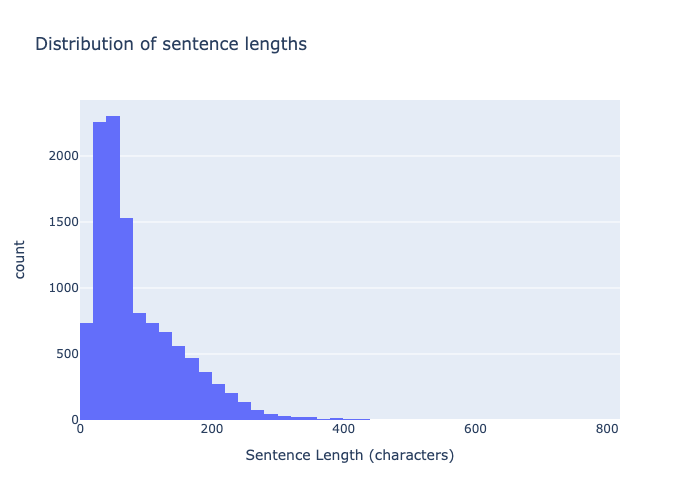

In [13]:
fig = px.histogram(df, x='sentence_length_char', nbins=55,
                   labels={'domain':'Domain', 'sentence_length_char':'Sentence Length (characters)'},
                   title="Distribution of sentence lengths"
                  )
fig.show("png")

### Distribution of number of characters in sentences per domain

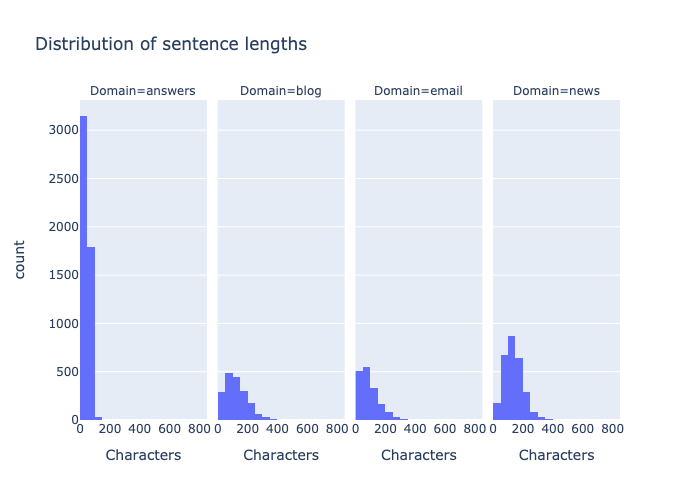

In [14]:
fig = px.histogram(df, x='sentence_length_char', nbins=35,
                   labels={'domain':'Domain', 'sentence_length_char':'Characters'},
                   title="Distribution of sentence lengths",
                   facet_col='domain'
                  )
fig.show("png")

### Distribution of number of words in sentences

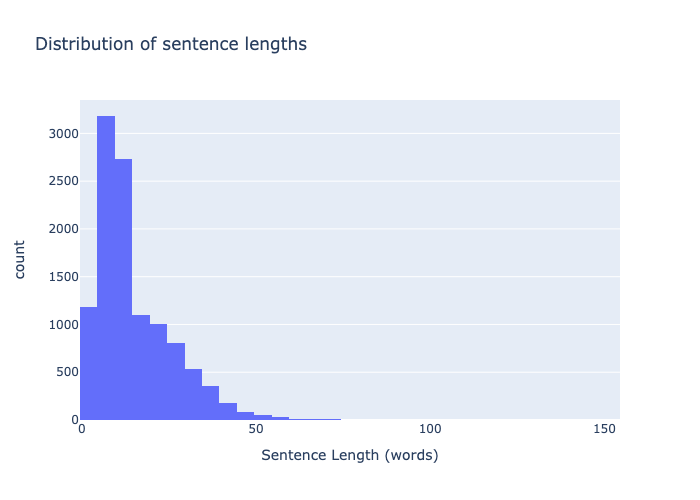

In [15]:
fig = px.histogram(df, x='sentence_length_words', nbins=55,
                   labels={'domain':'Domain', 'sentence_length_words':'Sentence Length (words)'},
                   title="Distribution of sentence lengths"
                  )
fig.show("png")

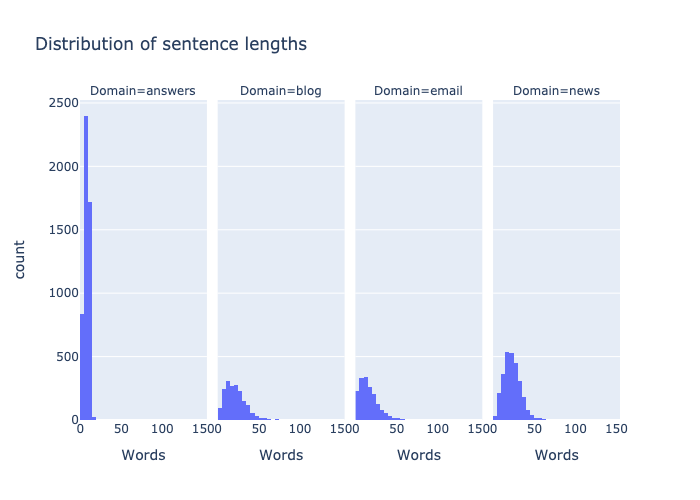

In [16]:
fig = px.histogram(df, x='sentence_length_words', nbins=55,
                   labels={'domain':'Domain', 'sentence_length_words':'Words'},
                   title="Distribution of sentence lengths",
                   facet_col='domain'
                  )
fig.show("png")

The distribution of sentence length in words within each domain shows the answers domain contains lots of short sentences while the other three domains have a skewed normal distribution that aligns more with expected sentence structure. Considering the answers domain contains the majority of informal sentences, this relationship needs more investigation.

### Is there a relationship between sentence length and formality?

In [17]:
df[['avg_score', 'sentence_length_char', 'sentence_length_words']].corr()

,avg_score,sentence_length_char,sentence_length_words
avg_score,1.000000,0.525933,0.495279
sentence_length_char,0.525933,1.000000,0.980558
sentence_length_words,0.495279,0.980558,1.000000


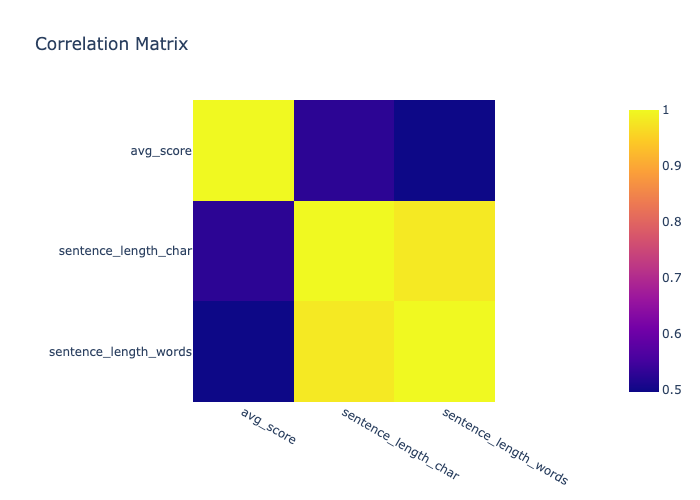

In [18]:
fig = px.imshow(df[['avg_score', 'sentence_length_char', 'sentence_length_words']].corr(),
                   labels={'avg_score':'Formality score', 'sentence_length_words':'Number of Words', 'sentence_length_char':'Number of characters'},
                   title="Correlation Matrix"
               )
fig.show("png")

Correlation matrix shows the formality score does correlate with sentence length.

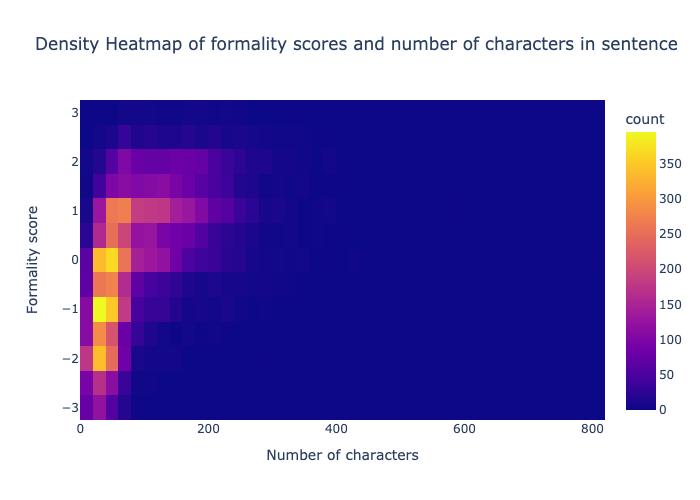

In [19]:
fig = px.density_heatmap(df, x='sentence_length_char', y='avg_score',
                         labels={'avg_score':'Formality score', 'sentence_length_words':'Number of Words', 'sentence_length_char':'Number of characters'},
                         title="Density Heatmap of formality scores and number of characters in sentence"
                        )
fig.show("png")

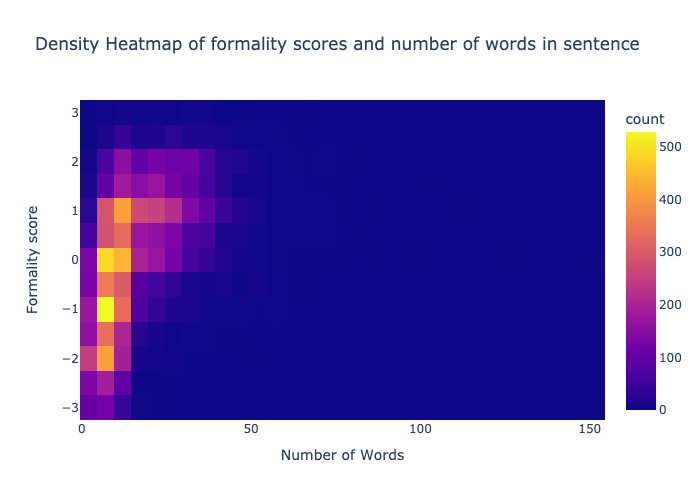

In [20]:
fig = px.density_heatmap(df, x='sentence_length_words', y='avg_score',
                         labels={'avg_score':'Formality score', 'sentence_length_words':'Number of Words', 'sentence_length_char':'Number of characters'},
                         title="Density Heatmap of formality scores and number of words in sentence"
                        )
fig.show("png")

The above two visualisations show the correlation between formality score and sentence length. There are no long informal sentences and only long and formal sentences. Therefore, caution needs to be taken to ensure that future trained models do not predict the formality based off the sentence length.